# Run Naivagation

In [1]:
import sys
sys.path.insert(0, "../src")

from PIL import Image
from mai_naivigation_agent import MAIUINaivigationAgent
from utils import draw_clicks_on_image, extract_click_coordinates

Image size: (1080, 2400)


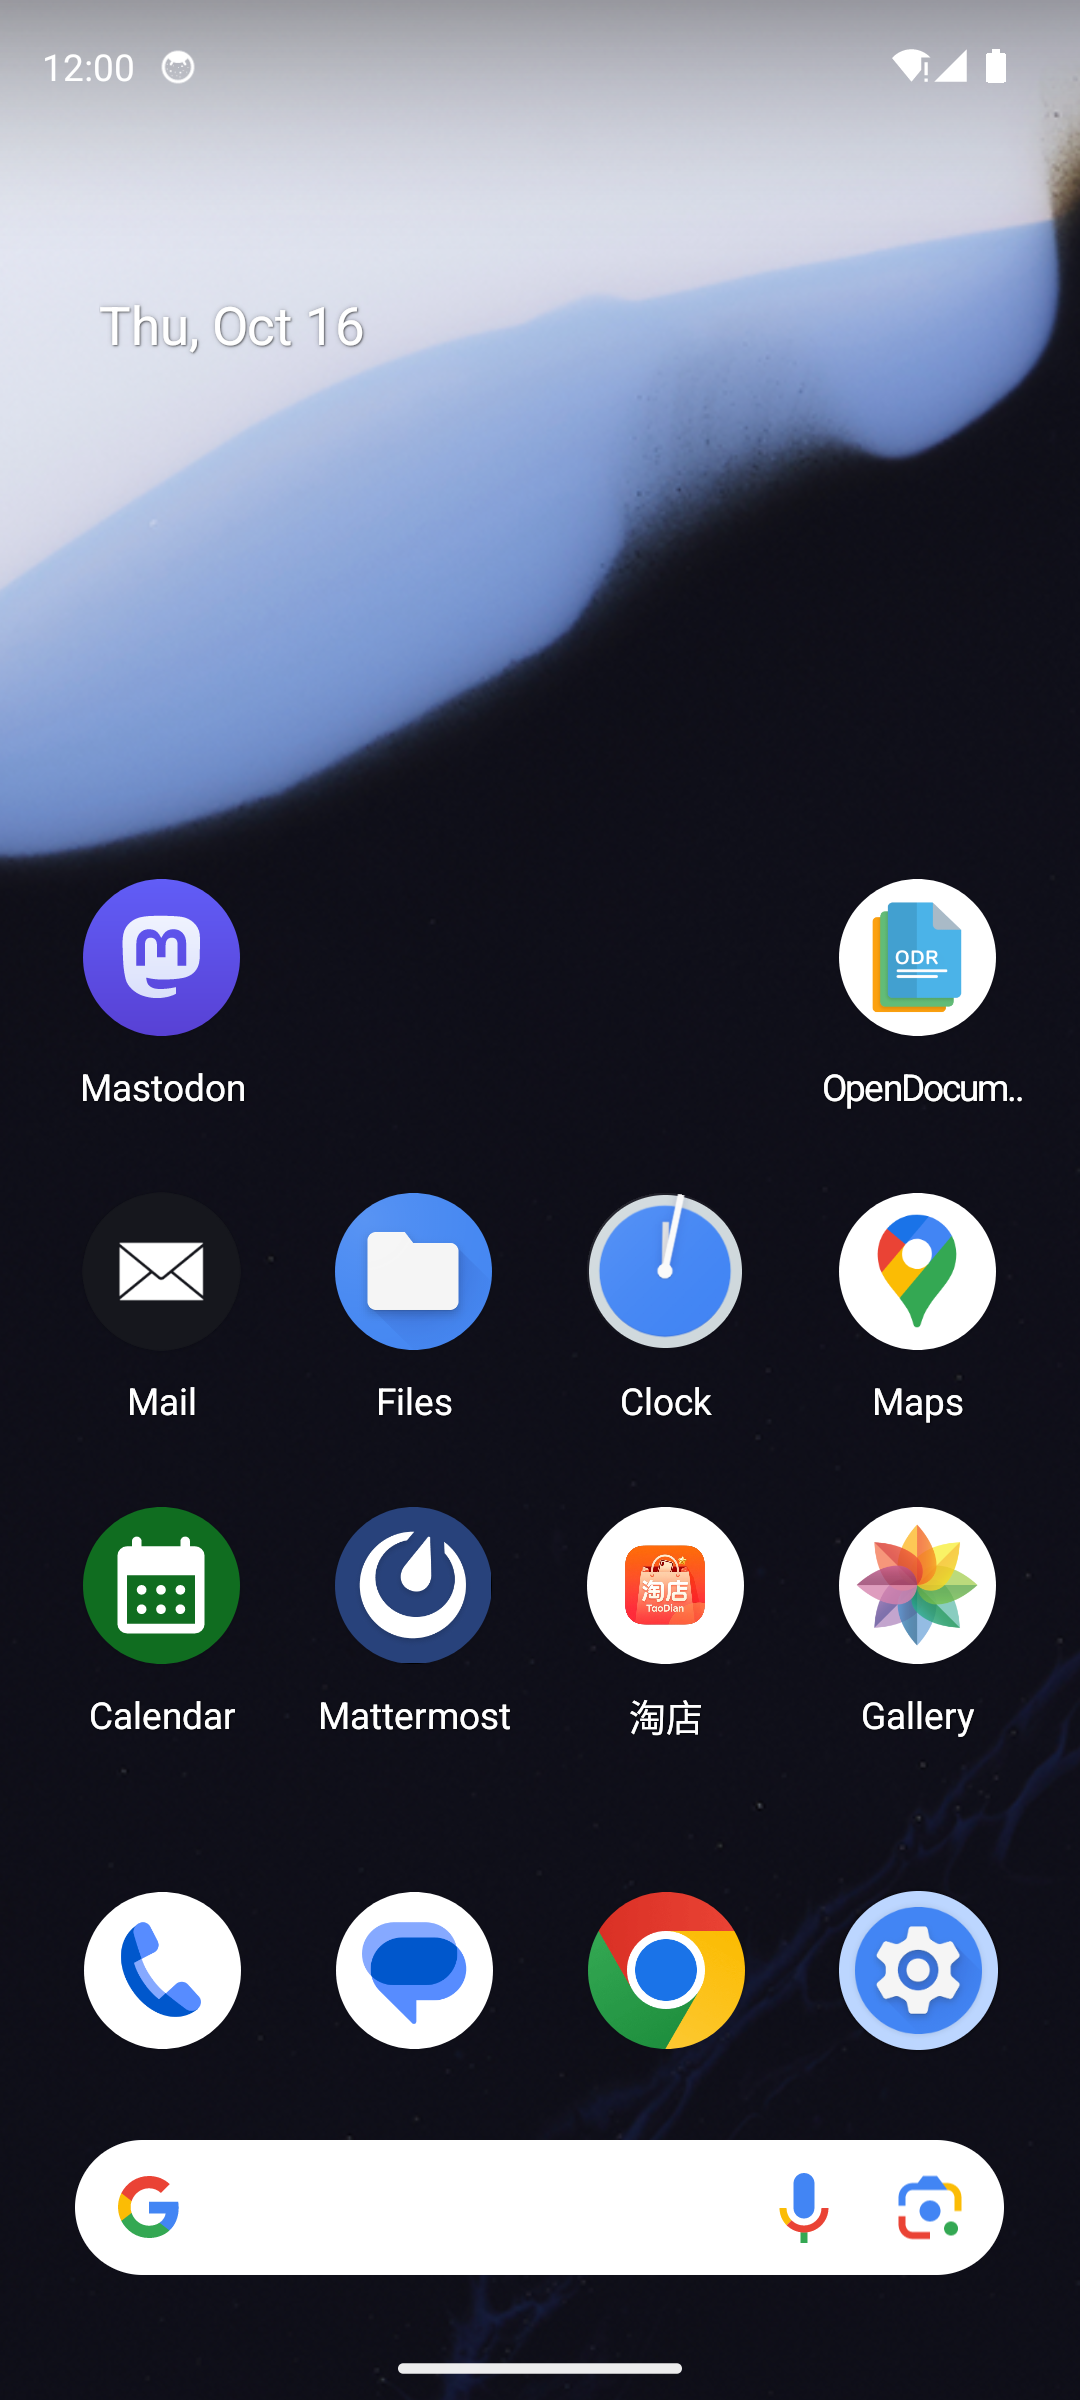

In [2]:
# Test configuration
SCREENSHOT_PATH_1 = "../resources/example_img/figure1.png"
SCREENSHOT_PATH_2 = "../resources/example_img/figure2.png"
SCREENSHOT_PATH_3 = "../resources/example_img/figure3.png"
SCREENSHOT_PATH_4 = "../resources/example_img/figure4.png"
SCREENSHOT_PATH_5 = "../resources/example_img/figure5.png"

# Load test image
test_image_1 = Image.open(SCREENSHOT_PATH_1)
test_image_2 = Image.open(SCREENSHOT_PATH_2)
test_image_3 = Image.open(SCREENSHOT_PATH_3)
test_image_4 = Image.open(SCREENSHOT_PATH_4)
test_image_5 = Image.open(SCREENSHOT_PATH_5)

print(f"Image size: {test_image_1.size}")
display(test_image_1)

In [ ]:
# Test instruction
instruction = "open the settings and turn on the wifi"

# Create agent instance
agent = MAIUINaivigationAgent(
    llm_base_url="http://localhost:8000/v1",
    model_name="MAI-UI-8B",
    runtime_conf={
        "history_n": 3,
        "temperature": 0.0,
        "top_k": -1,
        "top_p": 1.0,
        "max_tokens": 2048,
    },
)

In [4]:
# Run prediction for both images
test_images = [test_image_1, test_image_2, test_image_3, test_image_4, test_image_5]
results = []

for i, test_image in enumerate(test_images, 1):
    print(f"Processing Image {i}")
    
    obs = {"screenshot": test_image}
    print(f"Processing instruction: '{instruction}'")
    prediction, action = agent.predict(instruction, obs)
    
    # Print results
    print("\n=== Raw Model Response ===")
    print(prediction)
    print("\n=== Processed Action ===")
    print(action)
    
    results.append({
        "image_idx": i,
        "prediction": prediction,
        "action": action,
        "test_image": test_image
    })


Processing Image 1
Processing instruction: 'open the settings and turn on the wifi'
Messages (attempt 1):
[{'role': 'system', 'content': [{'type': 'text', 'text': 'You are a GUI agent. You are given a task and your action history, with screenshots. You need to perform the next action to complete the task.\n\n## Output Format\nFor each function call, return the thinking process in <thinking> </thinking> tags, and a json object with function name and arguments within <tool_call></tool_call> XML tags:\n```\n<thinking>\n...\n</thinking>\n<tool_call>\n{"name": "mobile_use", "arguments": <args-json-object>}\n</tool_call>\n```\n\n## Action Space\n\n{"action": "click", "coordinate": [x, y]}\n{"action": "long_press", "coordinate": [x, y]}\n{"action": "type", "text": ""}\n{"action": "swipe", "direction": "up or down or left or right", "coordinate": [x, y]} # "coordinate" is optional. Use the "coordinate" if you want to swipe a specific UI element.\n{"action": "open", "text": "app_name"}\n{"actio


Visualizing Image 1
Click coordinates (normalized): (0.8518518518518519, 0.8208208208208209)
Click coordinates (absolute): (920.0, 1969.9699699699702)


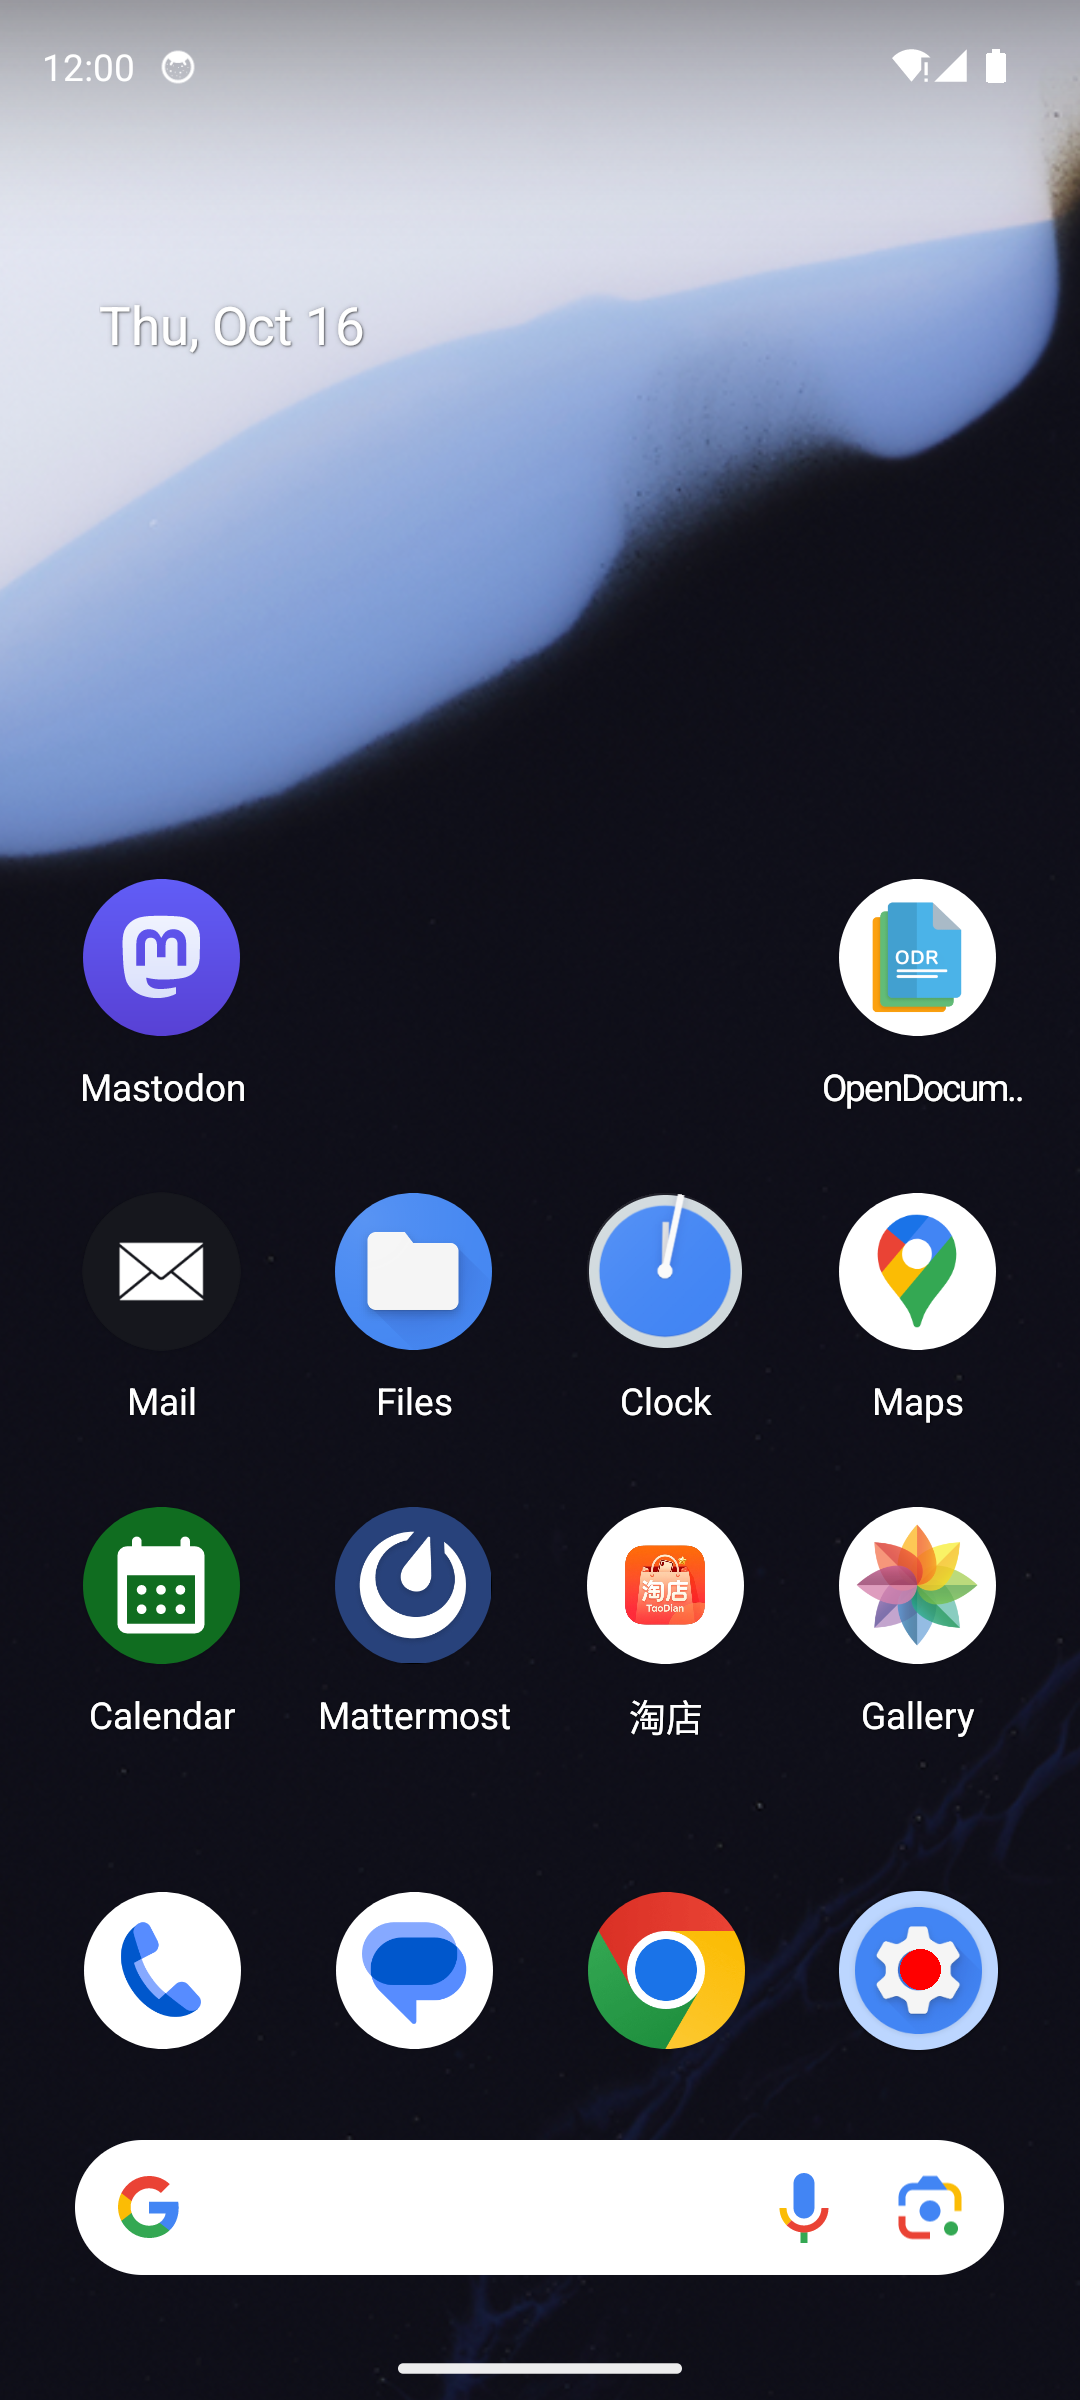


Visualizing Image 2
Click coordinates (normalized): (0.3663663663663664, 0.3633633633633634)
Click coordinates (absolute): (395.6756756756757, 872.0720720720722)


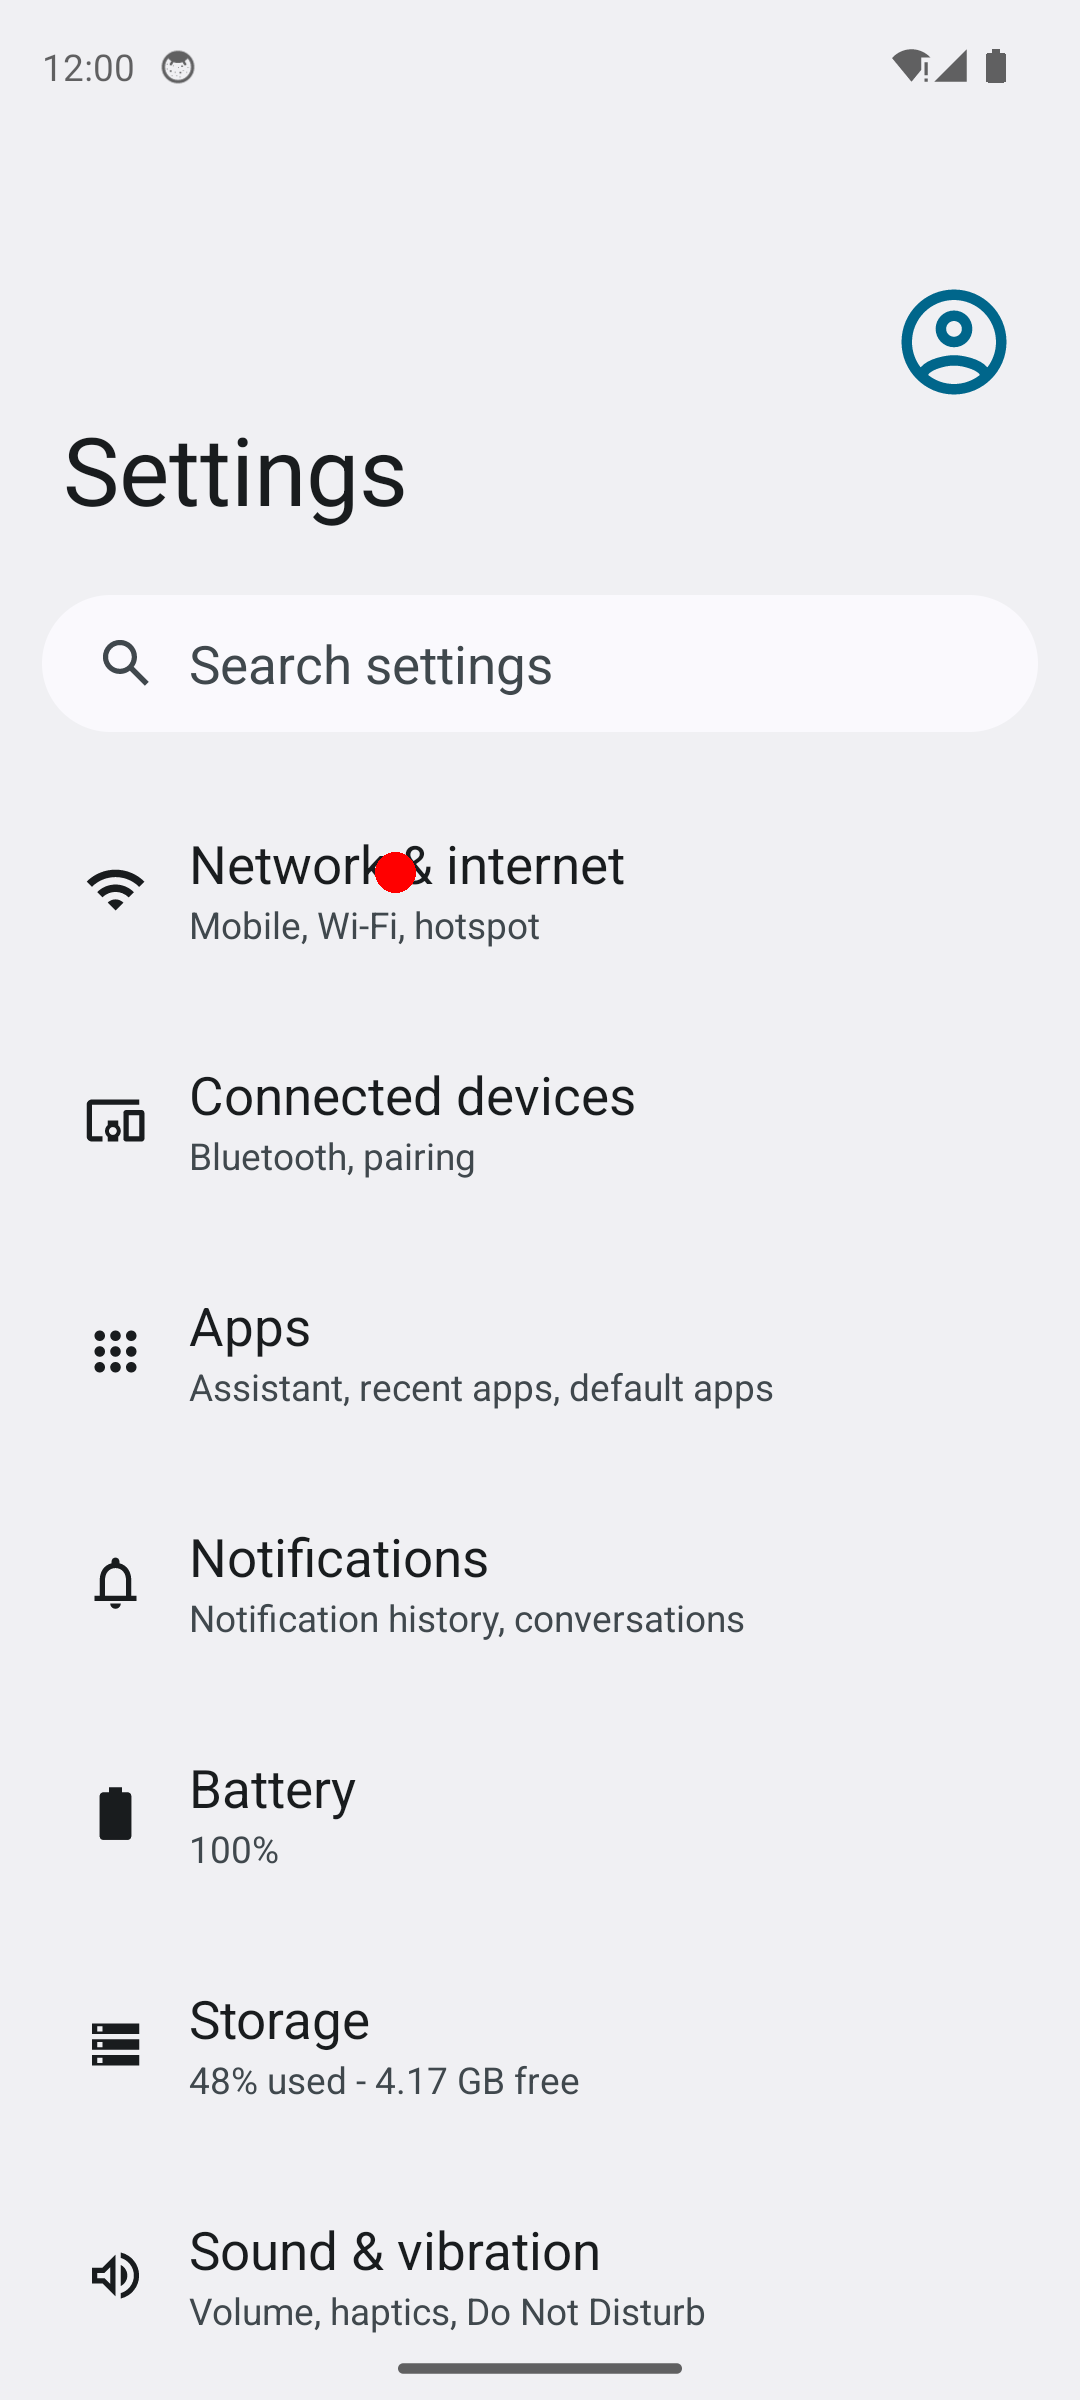


Visualizing Image 3
Click coordinates (normalized): (0.27427427427427425, 0.2862862862862863)
Click coordinates (absolute): (296.2162162162162, 687.0870870870871)


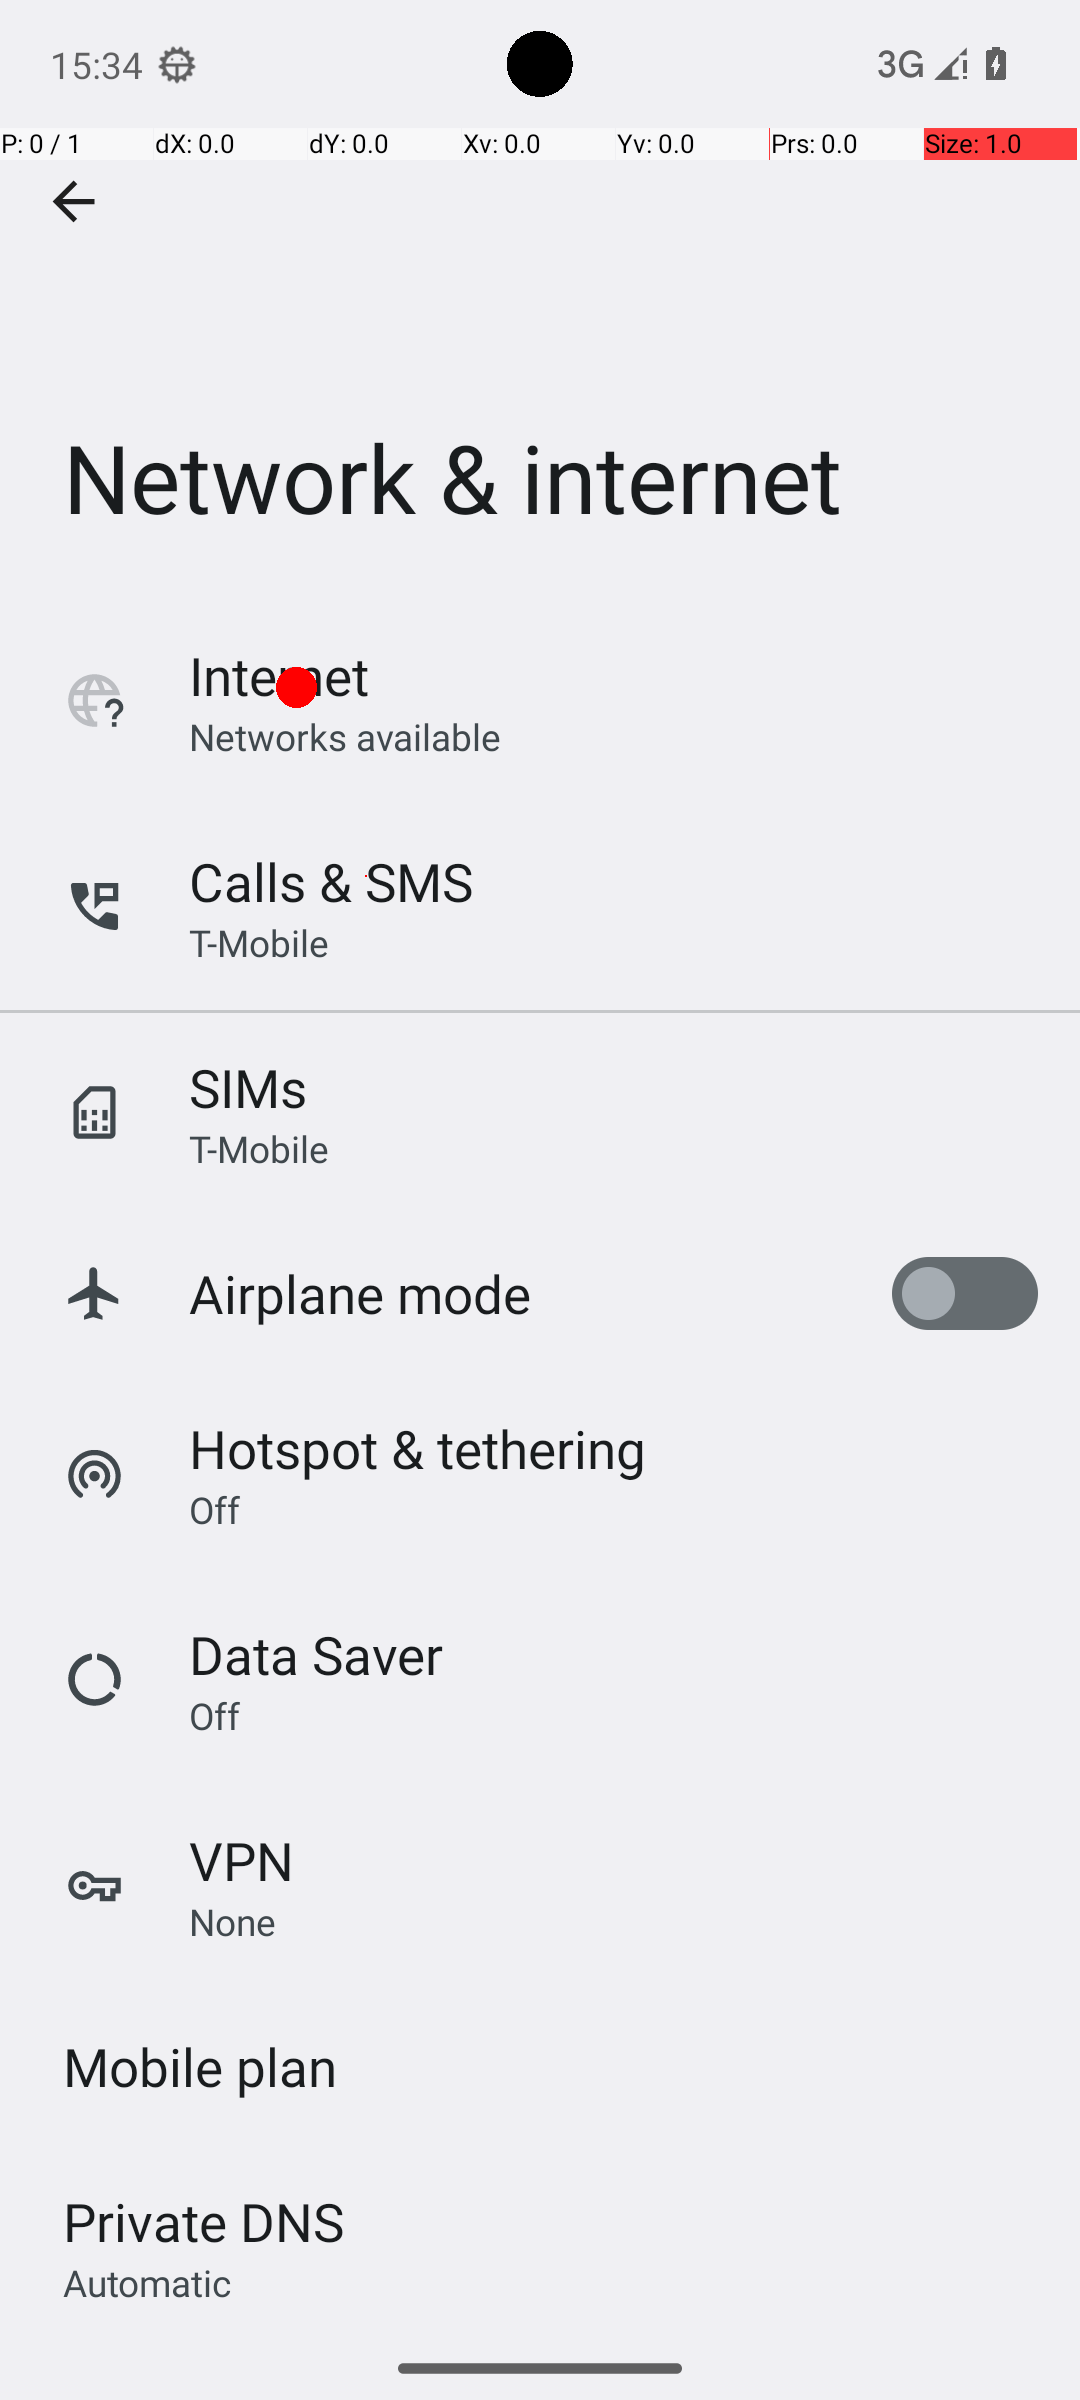


Visualizing Image 4
Click coordinates (normalized): (0.8948948948948949, 0.3713713713713714)
Click coordinates (absolute): (966.4864864864866, 891.2912912912914)


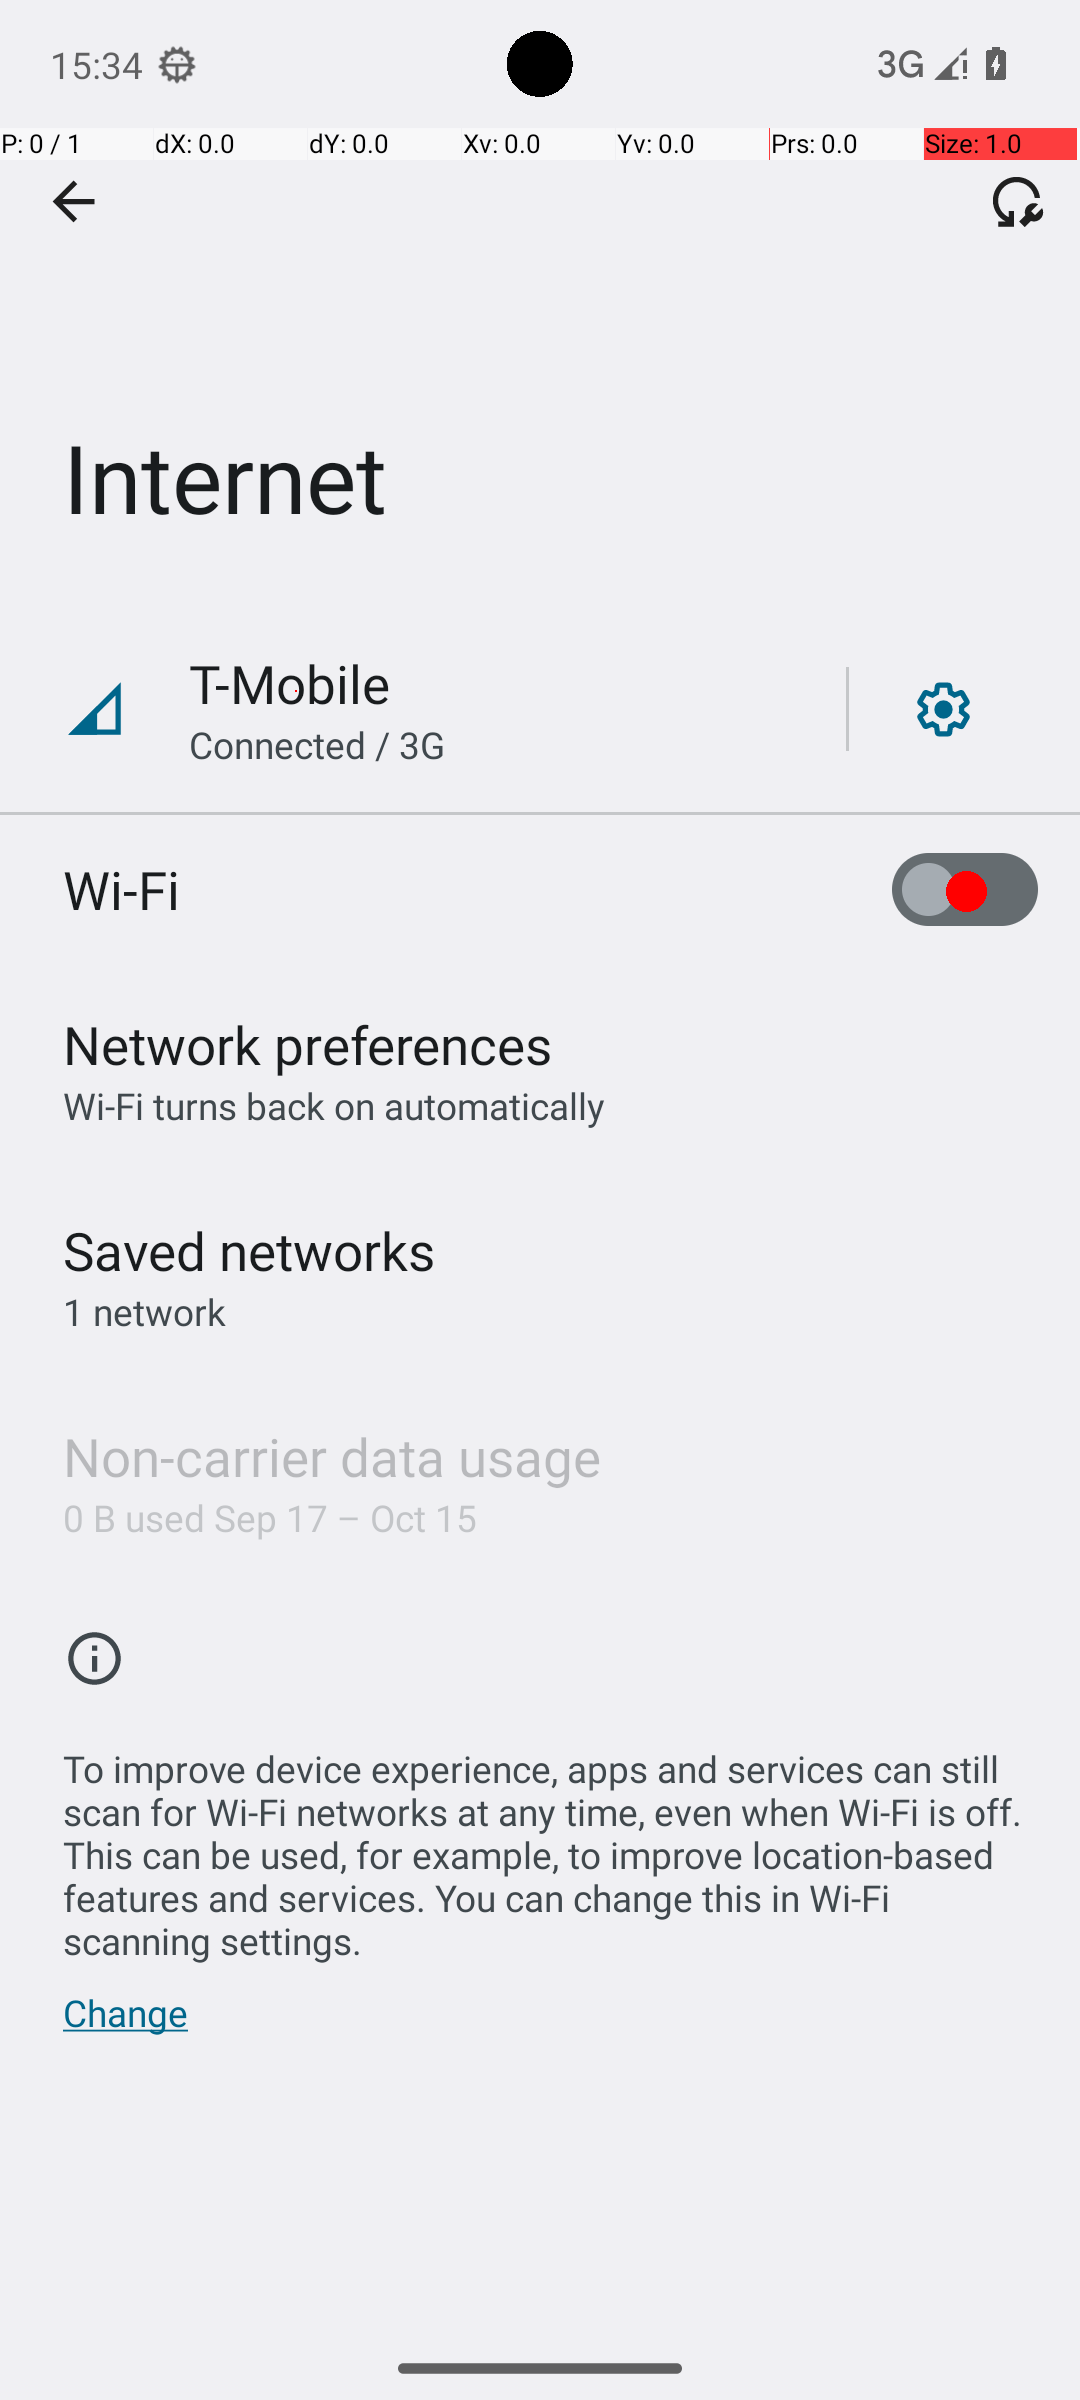


Visualizing Image 5
No click actions found in the provided actions.


In [5]:
screenshot_paths = [SCREENSHOT_PATH_1, SCREENSHOT_PATH_2, SCREENSHOT_PATH_3, SCREENSHOT_PATH_4, SCREENSHOT_PATH_5]

for result in results:
    i = result["image_idx"]
    action = result["action"]
    test_image = result["test_image"]
    screenshot_path = screenshot_paths[i - 1]
    
    print(f"\n{'='*50}")
    print(f"Visualizing Image {i}")
    print(f"{'='*50}")
    
    click_coordinates = extract_click_coordinates(action)
    if click_coordinates:
        abs_click_coordinates = (
            click_coordinates[0] * test_image.width, 
            click_coordinates[1] * test_image.height
        )
        print(f"Click coordinates (normalized): {click_coordinates}")
        print(f"Click coordinates (absolute): {abs_click_coordinates}")
        
        image = draw_clicks_on_image(screenshot_path, abs_click_coordinates)
        
        display(image)
    else:
        print("No click actions found in the provided actions.")
